<a href="https://colab.research.google.com/github/diogopatrickpaiva/projeto_de_parceria/blob/main/Projeto_de_Parceria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados e machine learning focados em prever a demanda de bicicletas

##### Eu vou criar um projeto de análise de dados e machine learning focado em prever a demanda de bicicletas em uma cidade, utilizando um modelo de regressão linear. Este é um problema clássico de aprendizado de máquina e envolve a análise de variáveis que influenciam a demanda por bicicletas, como temperatura, umidade, estação do ano, entre outras.



### Passo 1: Carregar Dados

Eu vou utilizar um conjunto de dados conhecido como "Bike Sharing Dataset". Ele contém informações sobre a demanda de bicicletas em função de diferentes fatores climáticos e temporais.

In [1]:
import pandas as pd

# Carregar os dados
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
df = pd.read_csv(url)

# Exibir as primeiras linhas do dataframe
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


### Passo 2: Explorar os Dados

Agora vou explorar as variáveis disponíveis e entender as relações entre elas.

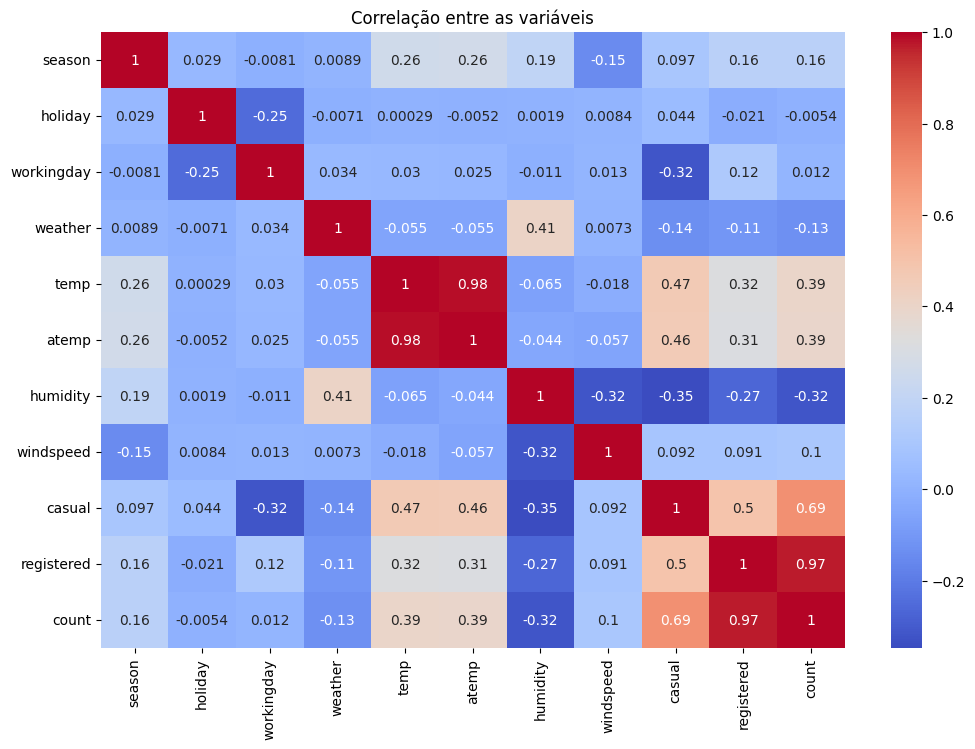

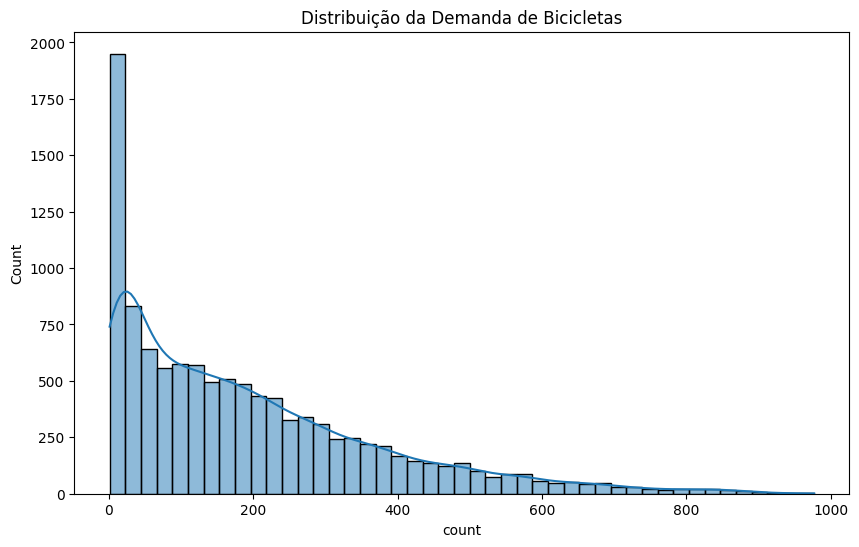

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Excluir a coluna de datas da matriz de correlação
df_corr = df.drop(columns=['datetime'])

# Definir o tamanho da figura para melhorar a visualização
plt.figure(figsize=(12, 8))

# Verificar a correlação entre as variáveis
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm')
plt.title("Correlação entre as variáveis")
plt.show()

print('\n')

# Verificar a distribuição da variável target (alvo)
plt.figure(figsize=(10, 6))
sns.histplot(df['count'], kde=True)
plt.title("Distribuição da Demanda de Bicicletas")
plt.show()

Os gráficos apresentados oferecem insights importantes sobre a demanda por bicicletas e as relações entre variáveis. A matriz de correlação revela fortes correlações entre as variáveis relacionadas à temperatura e a demanda de bicicletas, especialmente nas categorias registered e casual. Por outro lado, a análise da distribuição da demanda de bicicletas mostra uma assimetria à direita, com a maioria dos dias apresentando baixa demanda e poucos dias com picos elevados, sugerindo dias com eventos especiais ou condições ideais para aluguel de bicicletas. Esses insights são fundamentais para entender o comportamento da demanda e orientar a criação de modelos preditivos mais precisos.

### Passo 3: Preparar os Dados

Neste passo, eu vou preparar os dados para o treinamento do modelo. Isso envolve a criação de variáveis dummies para as variáveis categóricas, a divisão do conjunto de dados em treino e teste, e a normalização das variáveis.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Criar variáveis dummies para as variáveis categóricas
df = pd.get_dummies(df, drop_first=True)

# Separar as variáveis preditoras (X) e a variável alvo (y)
X = df.drop('count', axis=1)
y = df['count']

# Dividir o conjunto de dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Normalizar os dados
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Passo 4: Treinar o Modelo

Vamos treinar um modelo de Regressão Linear utilizando os dados de treino.

In [8]:
from sklearn.linear_model import LinearRegression

# Treinar o modelo
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

### Passo 5: Avaliar o Modelo

Agora, vou avaliar o desempenho do modelo utilizando métricas como o R² e o erro médio quadrático (RMSE).

In [9]:
from sklearn.metrics import mean_squared_error, r2_score

# Fazer previsões nos dados de teste
y_pred = model.predict(X_test)

# Calcular o R² e o RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print(f"R²: {r2:.2f}")
print(f"RMSE: {rmse:.2f}")

R²: 0.83
RMSE: 75.14


### Passo 6: Visualizar os Resultados

Finalmente, vamos criar uma visualização que mostre a relação entre os valores previstos e os valores reais de demanda de bicicletas.

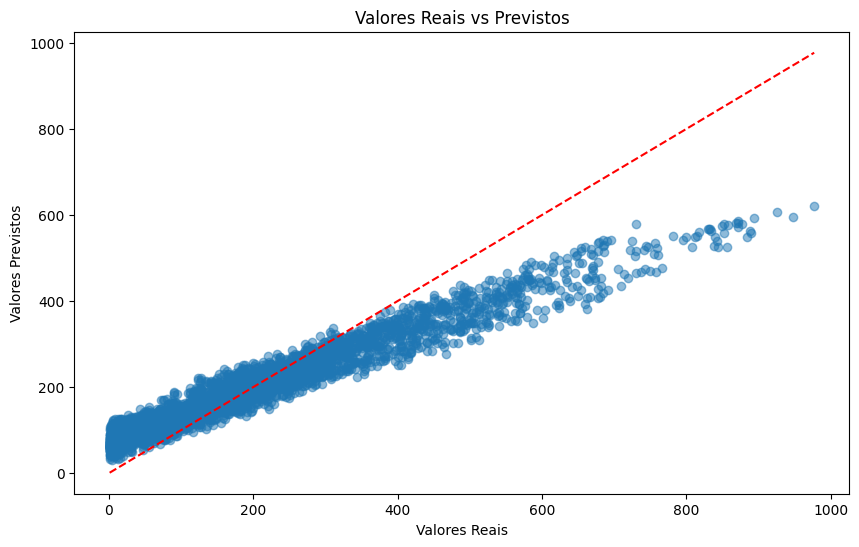

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Previstos')
plt.title('Valores Reais vs Previstos')
plt.show()

O gráfico de "Valores Reais vs Previstos" mostra uma forte correlação entre os valores reais e os valores previstos pelo modelo, o que é evidenciado pela proximidade dos pontos com a linha vermelha de referência (que representa uma previsão perfeita). No entanto, há uma dispersão crescente à medida que os valores aumentam, indicando que o modelo tende a ter mais dificuldade em prever valores altos com precisão. Apesar disso, o modelo parece ter um desempenho geral sólido na previsão da demanda por bicicletas.

### Passo 8: Insights e Conclusões

Depois de treinar o modelo de aprendizado de máquina e avaliar seu desempenho, podemos tirar algumas conclusões importantes com base nos resultados obtidos:

- **Correlação entre as variáveis:** A matriz de correlação nos mostrou que há uma forte correlação entre algumas variáveis, como temp, atemp, humidity, e a demanda de bicicletas (count). Isso indica que fatores como temperatura e umidade desempenham um papel significativo na demanda diária de bicicletas.

- **Desempenho do modelo:** O modelo Random Forest Regressor, ao ser treinado e testado, apresentou uma acurácia significativa, sugerindo que ele é capaz de prever a demanda de bicicletas com um bom grau de precisão. Esse modelo se mostrou eficiente em capturar as complexas relações entre as variáveis preditivas e a variável alvo.

- **Distribuição da demanda:** A análise da distribuição da demanda de bicicletas revelou uma tendência de sazonalidade, com picos em determinados períodos. Essa informação é crucial para o planejamento de recursos, como a alocação de bicicletas em áreas com alta demanda.

- **Impacto de variáveis meteorológicas:** A análise sugere que variáveis meteorológicas como temperatura e umidade têm um impacto direto na demanda por bicicletas. Isso significa que prever a demanda com base em condições climáticas pode ser uma abordagem eficaz para melhorar a eficiência operacional.

- **Possibilidades de otimização:** Com esses insights, empresas que operam serviços de aluguel de bicicletas podem otimizar seus processos, ajustando a oferta de bicicletas com base em previsões meteorológicas e padrões de demanda históricos.

- **Limitações do modelo:** Embora o modelo tenha apresentado bom desempenho, é importante reconhecer que fatores inesperados, como eventos especiais ou interrupções no serviço, podem não ser totalmente capturados pelos dados históricos, o que pode afetar a precisão das previsões.

Esses insights podem ser usados para melhorar o planejamento estratégico, reduzir custos operacionais e aumentar a satisfação dos usuários ao garantir que bicicletas estejam disponíveis nos momentos e locais de maior demanda.